In [233]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

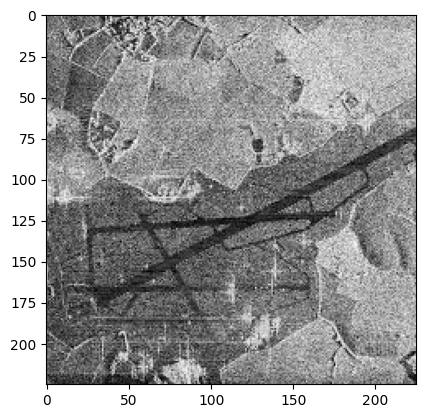

In [234]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

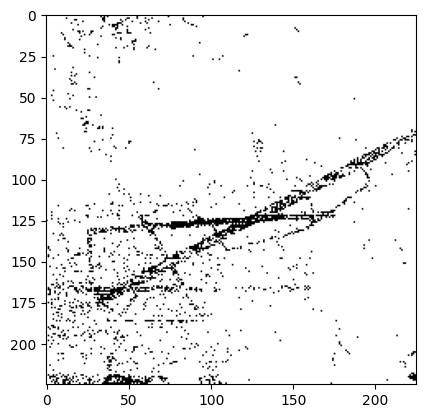

In [235]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

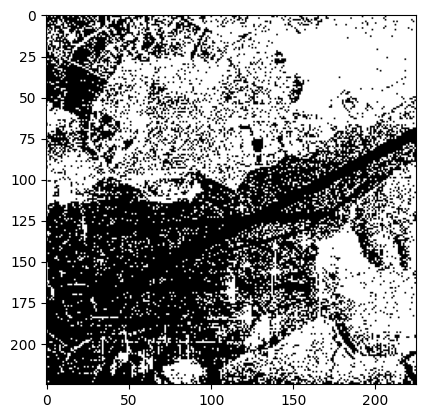

In [236]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

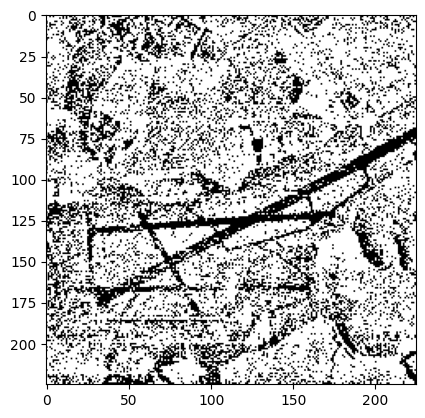

In [237]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [238]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

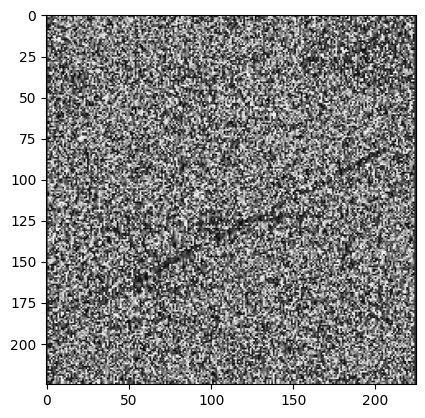

In [239]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

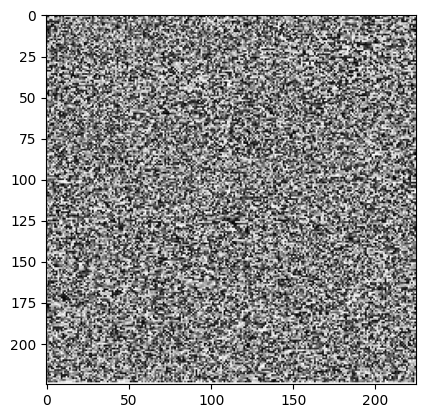

In [240]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [241]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

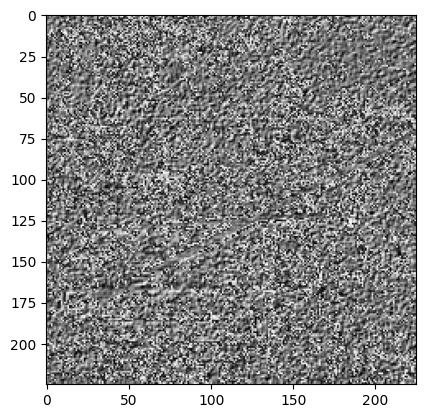

In [242]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

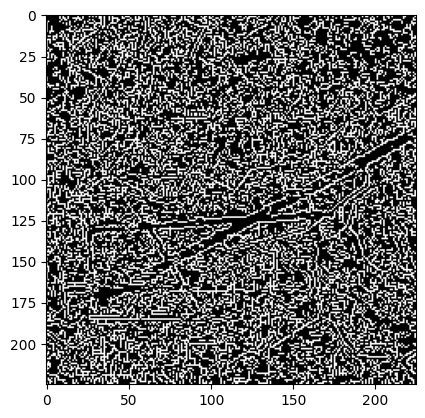

In [243]:
edges = cv2.Canny(image_gray,100,200)
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

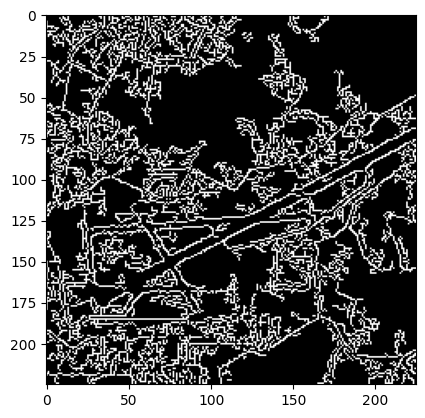

In [244]:
import math 

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gauss_fastNl = cv2.fastNlMeansDenoising(image_gray, h=20)
canny = cv2.Canny(image_gauss_fastNl,0,250,apertureSize = 3)
plt.imshow(canny, cmap="gray")

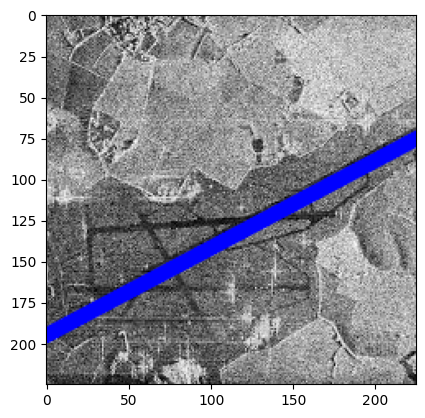

In [245]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 110)
max_length = 0
longest_line = None
image_copy = image.copy()
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        length = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)
    if longest_line:
        cv2.line(image_copy, longest_line[0], longest_line[1], (0, 0, 255), 7, cv2.LINE_AA)
plt.imshow(image_copy)

In [246]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

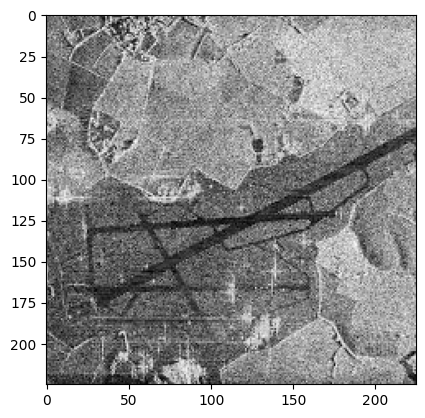

In [247]:
plt.imshow(image)

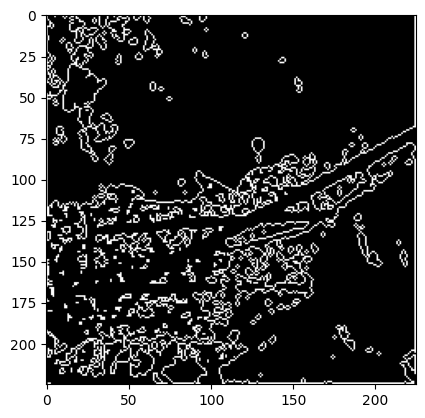

In [296]:
image = cv2.imread("sar_3.jpg")
filterd_image = cv2.medianBlur(image, 3)
img_grey = cv2.cvtColor(filterd_image,cv2.COLOR_BGR2GRAY)
thresh = 100
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = np.uint8(np.zeros((image.shape[0],image.shape[1])))

contours_itog = [contour for contour in contours if len(contour)>1]

cv2.drawContours(img_contours, contours_itog, -1, (255,255,255), 1)
plt.imshow(img_contours, cmap="grey")